# I] Import and options


In [8]:
import pandas, numpy, seaborn
# import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# have text as text and not curve in .svg
matplotlib.rcParams['svg.fonttype'] = 'none'
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':24, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(12, 8)})

In [9]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] DL data

In [10]:
%%time
#DL + open
path = input_file_directory + "mefs/mefs_proliferation/exp3_proliferation.csv"
prolif_df = pandas.read_csv(path, sep = ";")
#change comma to dot
prolif_df = prolif_df.astype(str)
prolif_df = prolif_df.apply(lambda x: x.str.replace(',','.'))
#convert to float
prolif_df = prolif_df.astype(float)
prolif_df = prolif_df.iloc[:31,:]
print(prolif_df.shape)
prolif_df.tail()

(21, 49)
Wall time: 27 ms


,Elapsed,Normal + DMEM + DMSO,EV + DMEM + DMSO,WT1 + DMEM + DMSO,dVSR(1) + DMEM + DMSO,WT2 + DMEM + DMSO,dVSR(2) + DMEM + DMSO,Normal + DMEM + BAF,EV + DMEM + BAF,WT1 + DMEM + BAF,...,WT1 + Starvation + DMSO (Std Err Img),dVSR(1) + Starvation + DMSO (Std Err Img),WT2 + Starvation + DMSO (Std Err Img),dVSR(2) + Starvation + DMSO (Std Err Img),Normal + Starvation + BAF (Std Err Img),EV + Starvation + BAF (Std Err Img),WT1 + Starvation + BAF (Std Err Img),dVSR(1) + Starvation + BAF (Std Err Img),WT2 + Starvation + BAF (Std Err Img),dVSR(2) + Starvation + BAF (Std Err Img)
16,32.0,66.95657,56.66178,58.66779,67.66946,68.16912,77.41238,47.11825,42.22197,43.53107,...,9.287899,2.716726,4.502647,9.906205,3.490765,4.623534,2.028327,3.902300,5.007692,2.468532
17,34.0,69.25909,75.22632,76.66278,82.59960,83.59840,87.32021,50.07435,37.85205,38.92245,...,16.665550,7.985293,8.357716,13.209720,5.318291,6.394738,1.901698,4.355252,5.685599,1.827575
18,36.0,73.78409,65.96655,66.62367,76.79001,79.65472,86.71921,46.30105,39.96524,39.64922,...,9.987211,2.947760,6.226460,11.199780,3.357033,5.039723,2.245246,4.979893,5.926261,2.070645
19,38.0,80.57106,64.94678,73.34218,88.03574,89.06725,94.28854,49.53020,43.21371,41.41597,...,11.514550,2.930858,6.041761,12.926650,3.832351,6.217012,1.688375,6.010711,7.186559,1.971271
20,40.0,78.74565,73.85188,77.45860,83.89312,83.25977,89.39846,41.07077,33.97165,32.36975,...,15.012500,3.291835,4.642512,10.643740,3.702552,3.847496,1.407975,5.896440,4.291053,1.993809


In [11]:
#List of columns_ I have 6 cell lines per condition and 4 conditions

##select RICH DMEM with only dmso
prolif_rich_DMSO = prolif_df.iloc[:,1:7].columns
##select RICH DMEM with only baf
prolif_rich_BAF = prolif_df.iloc[:,7:13].columns
##df with STARV with only dmso
prolif_starv_DMSO = prolif_df.iloc[:,13:19].columns
##df with STARV with only baf
prolif_starv_BAF = prolif_df.iloc[:,19:25].columns

findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


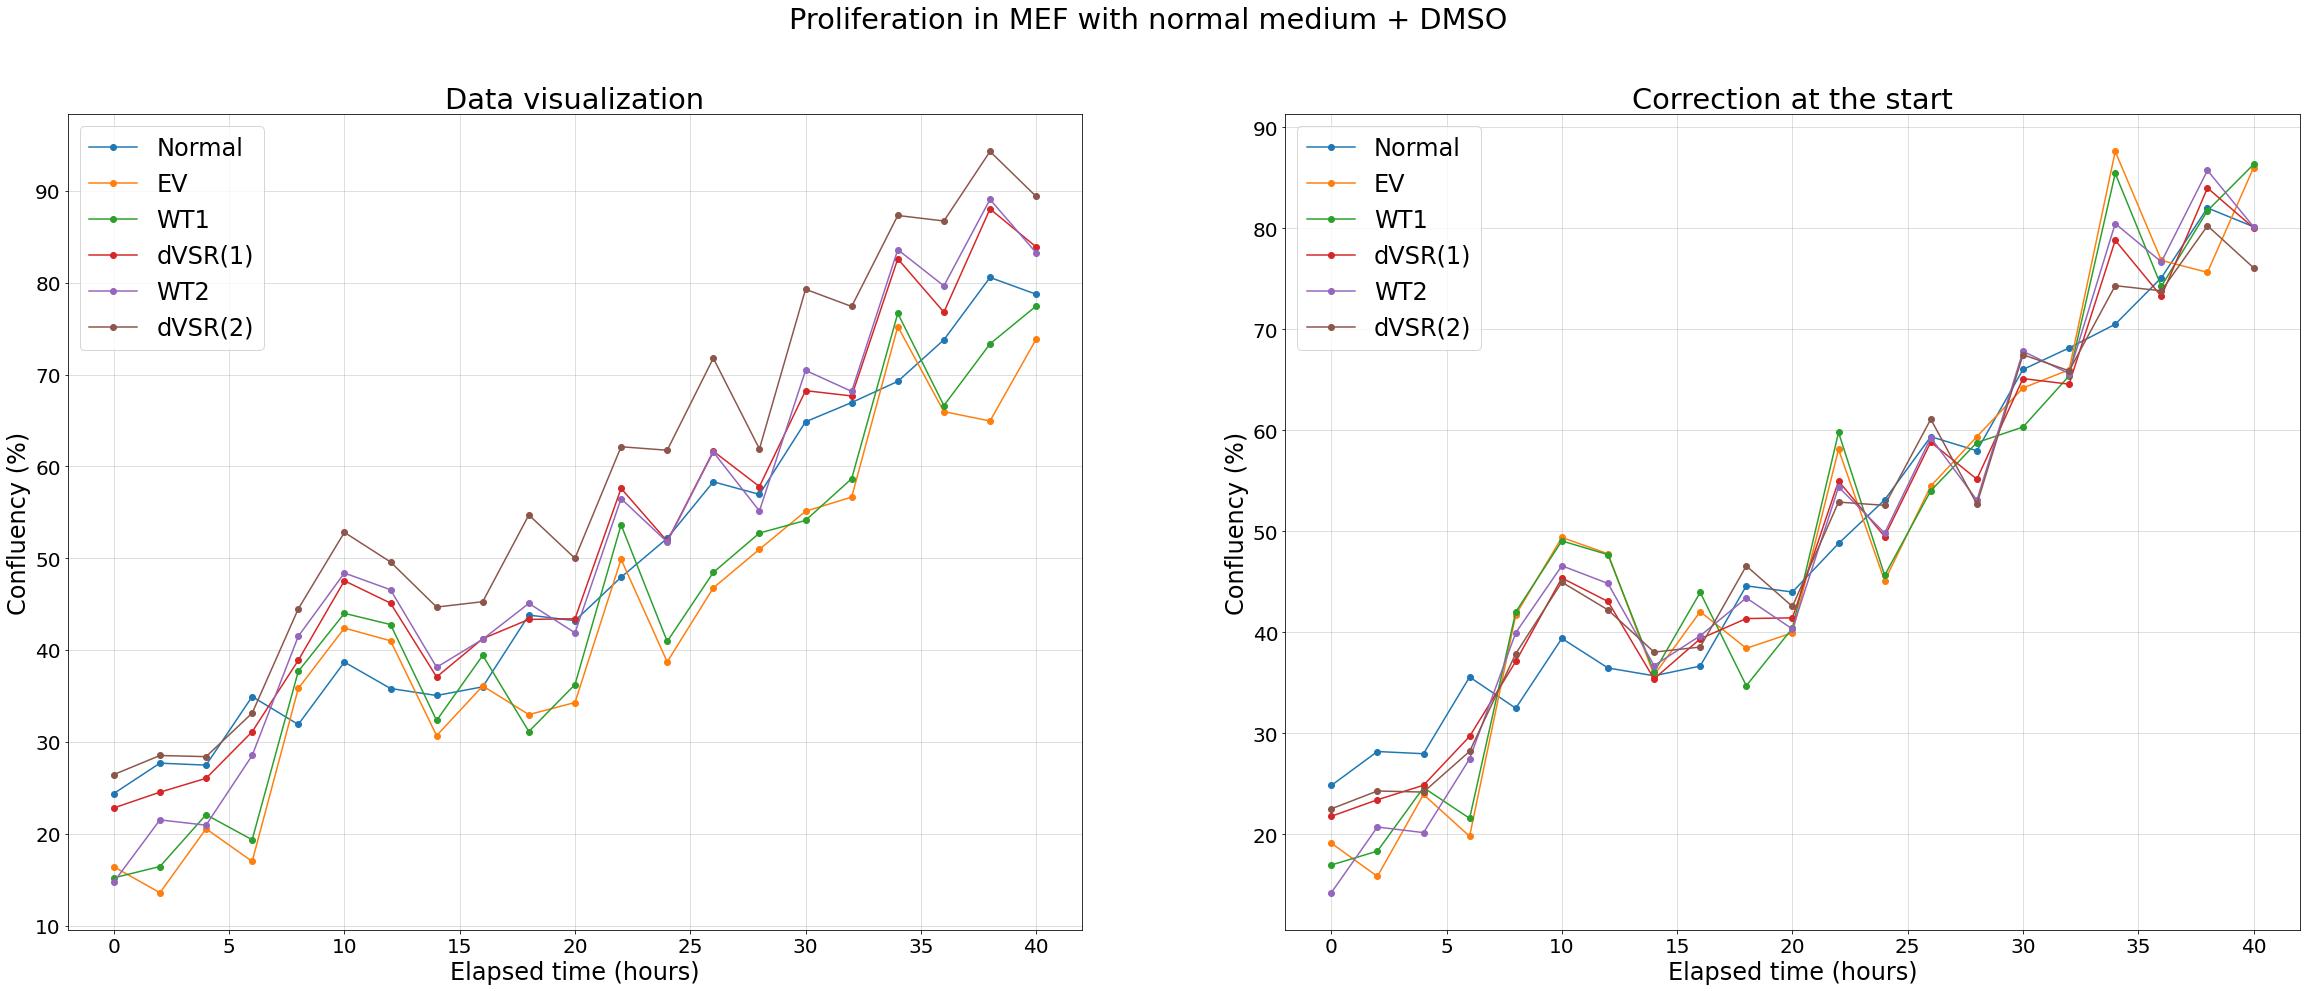

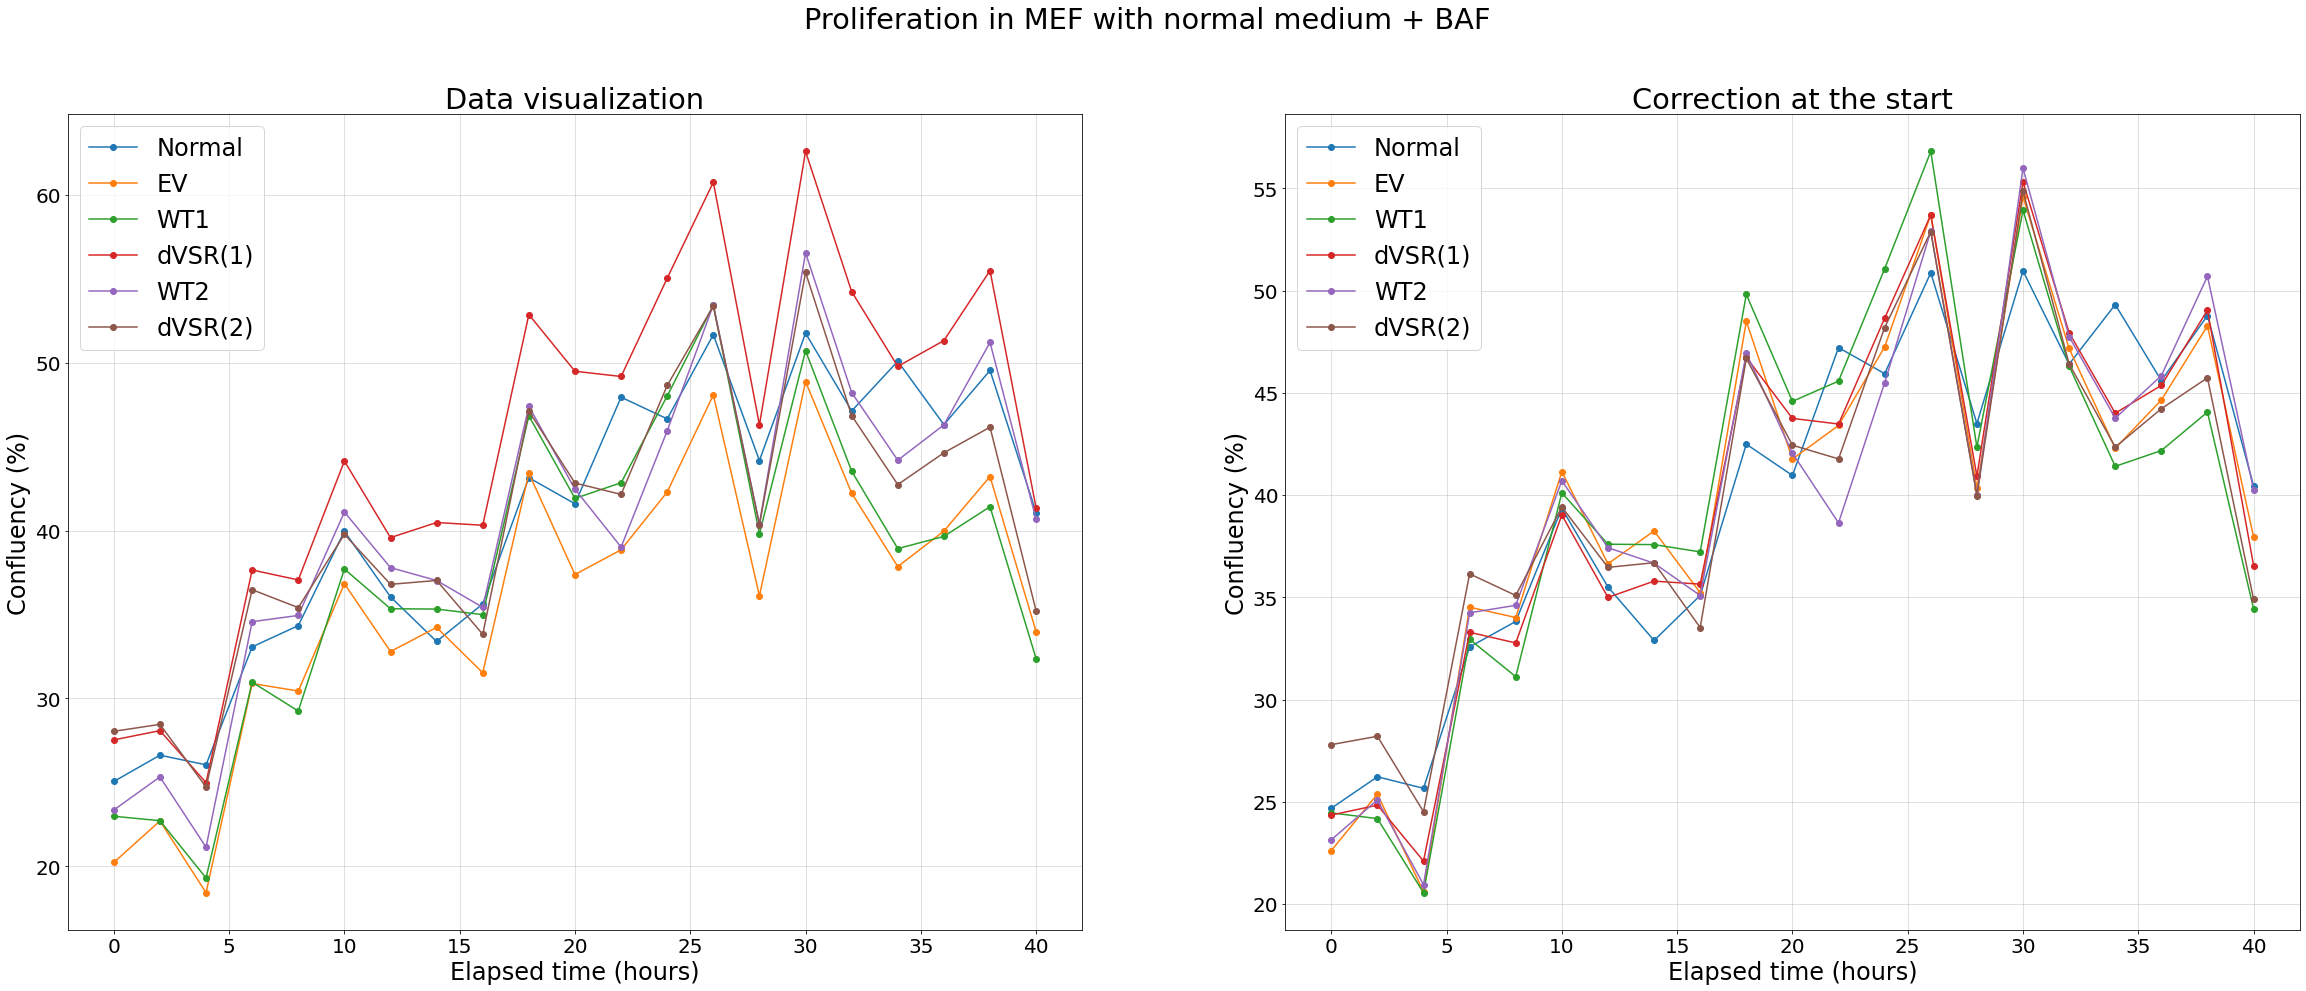

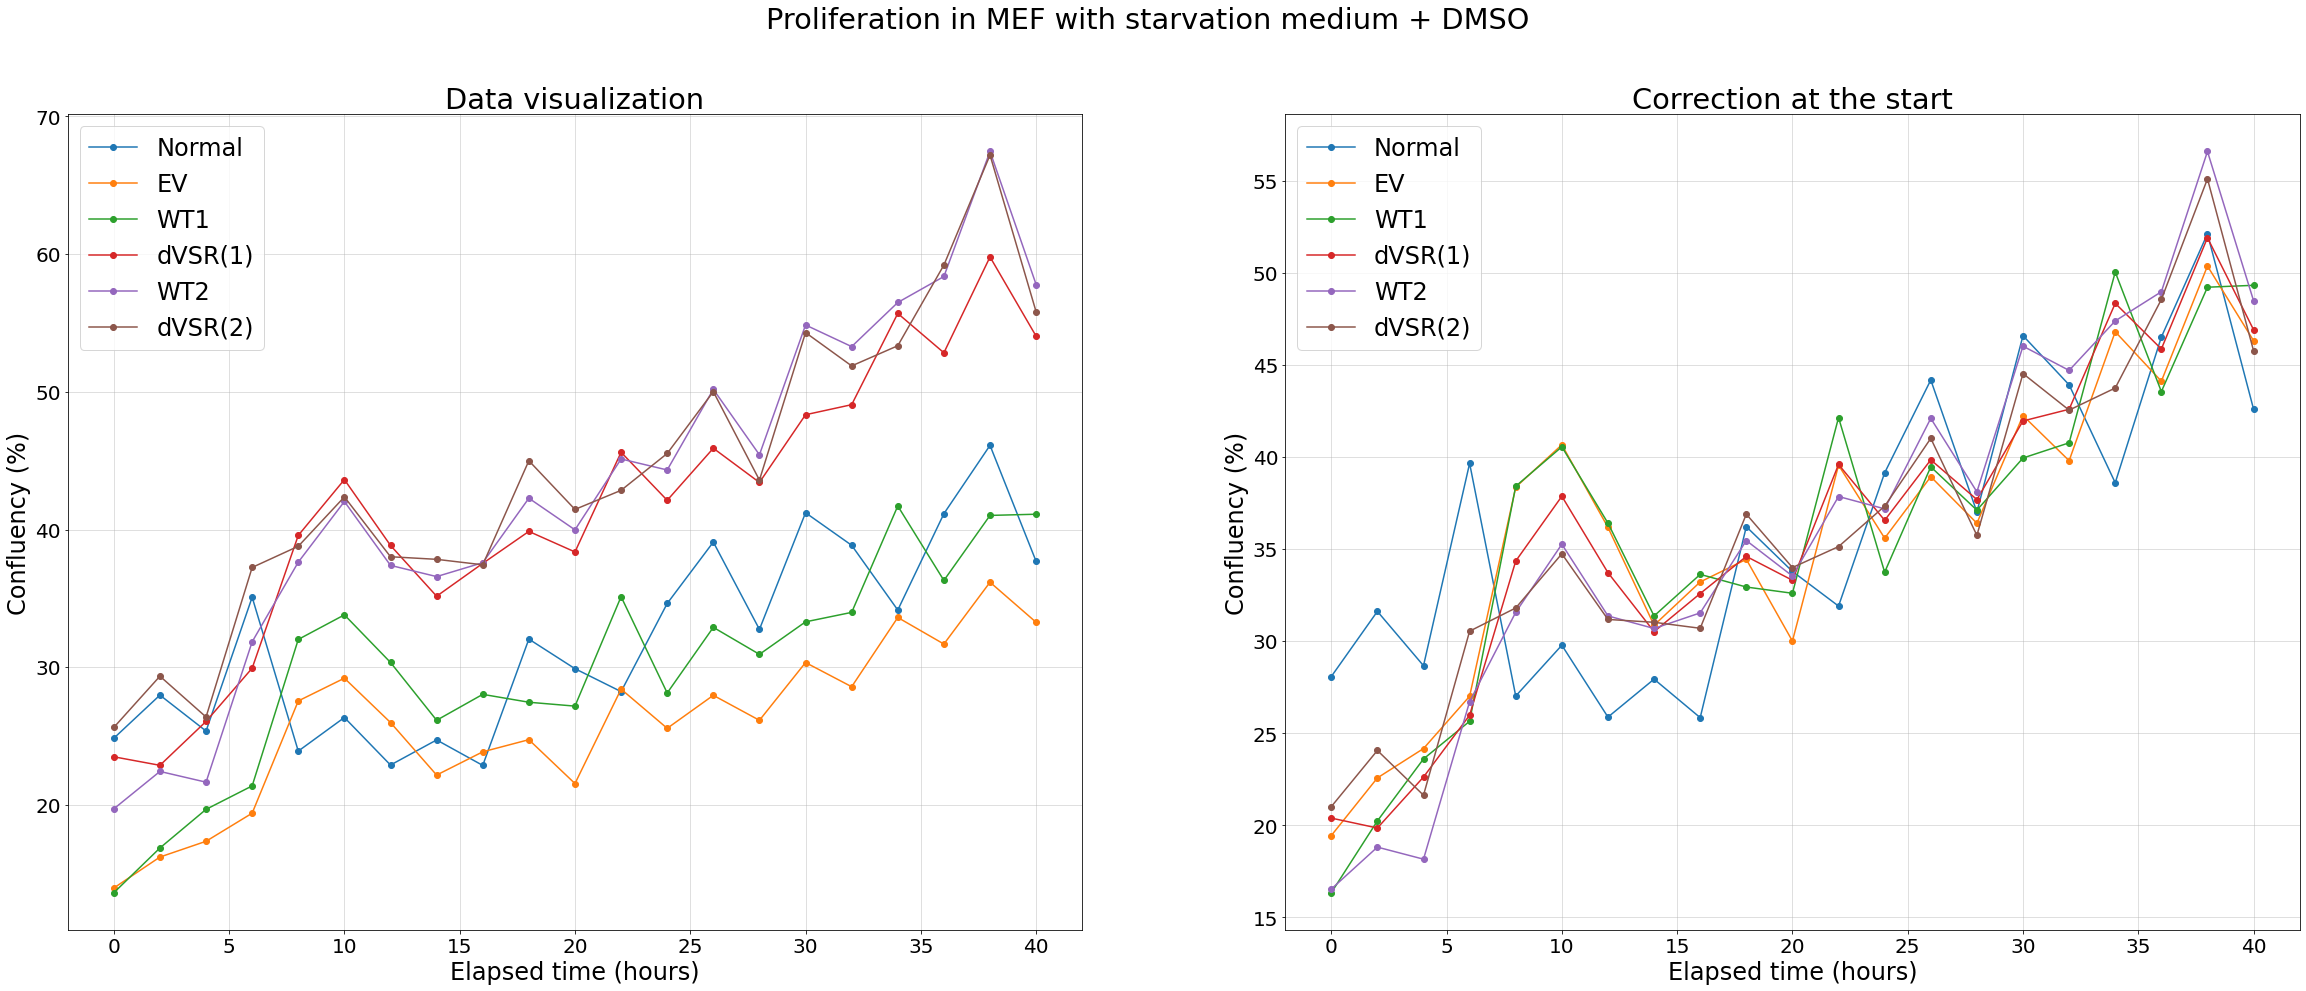

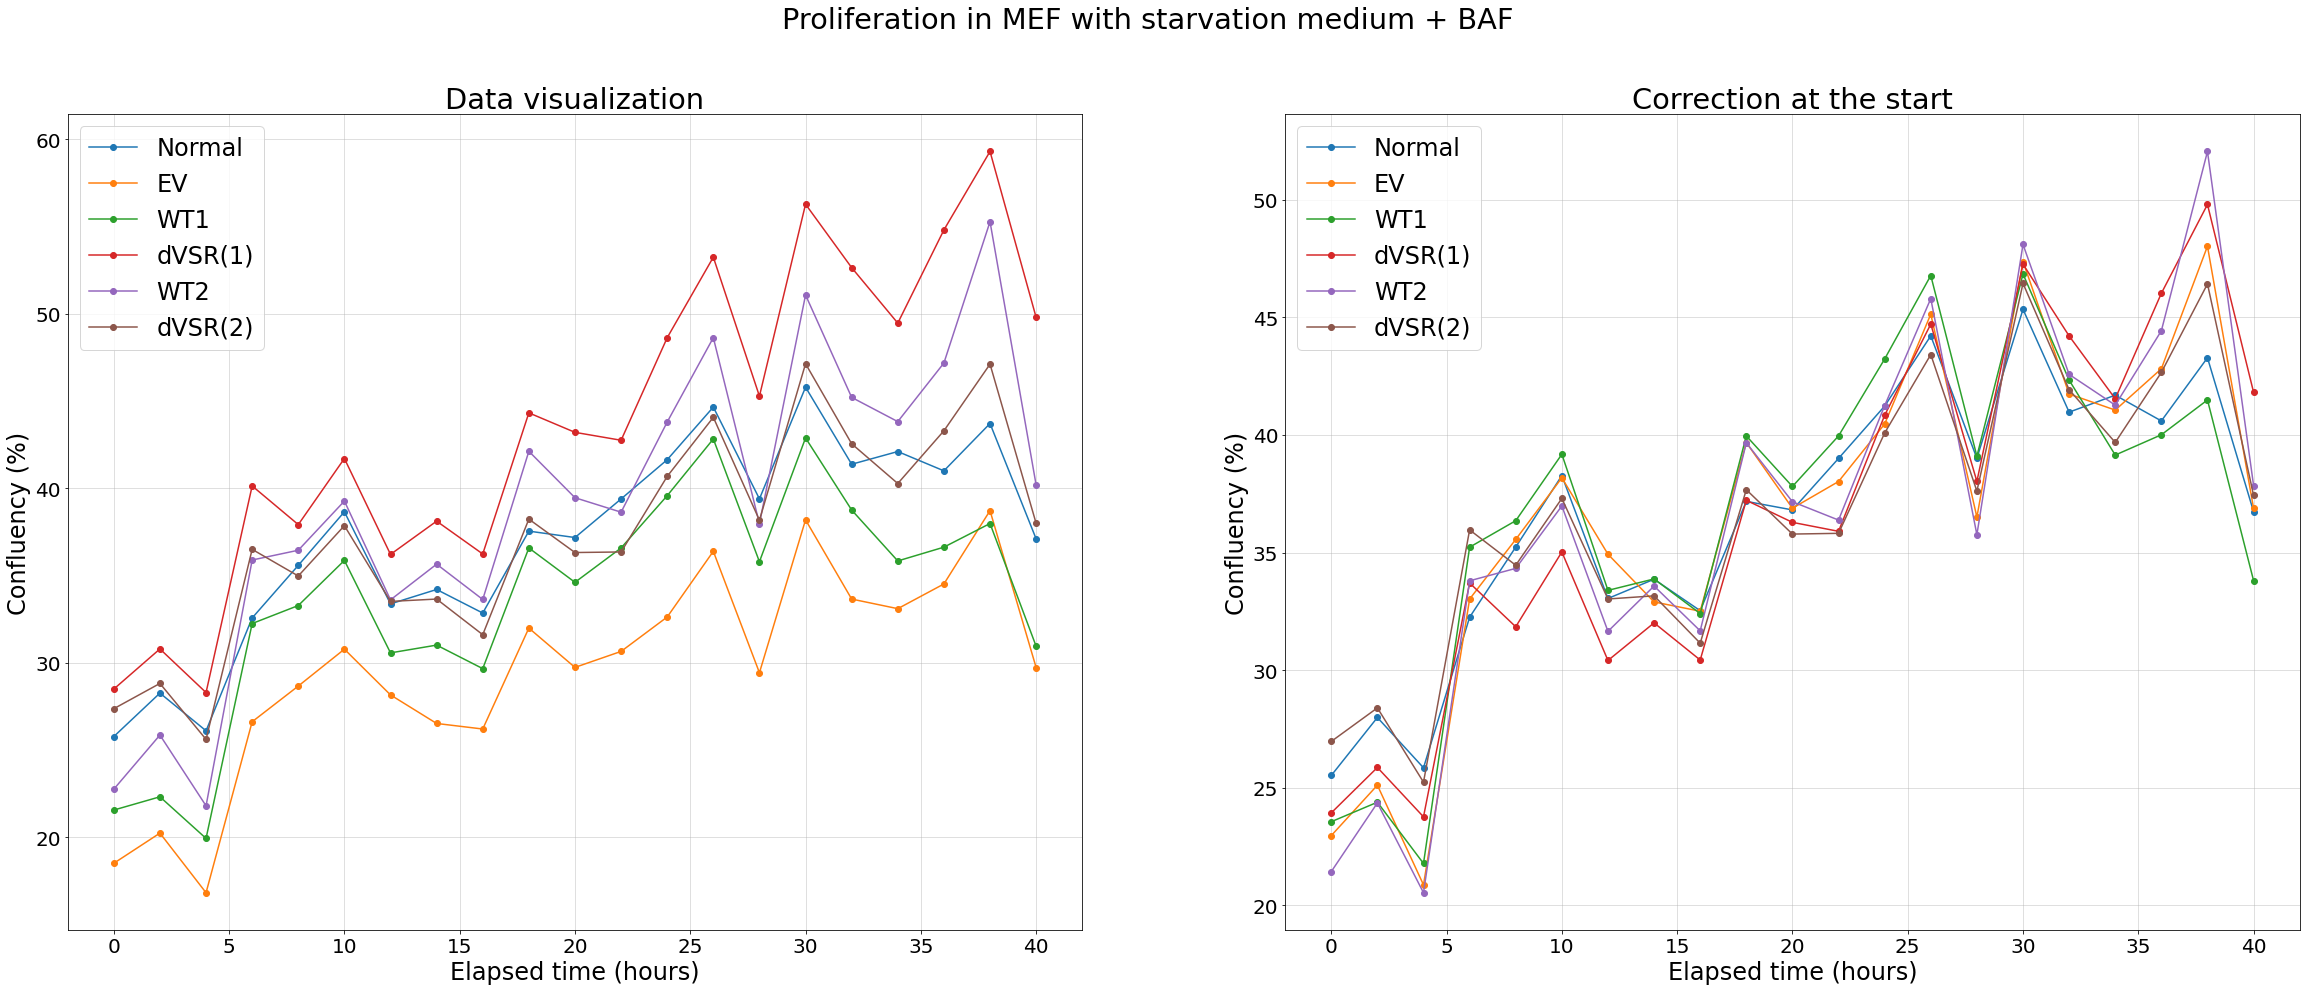

In [12]:
#Visualization of all data
columns_list = [prolif_rich_DMSO, prolif_rich_BAF, prolif_starv_DMSO, prolif_starv_BAF]
conditions = [' with normal medium + DMSO', ' with normal medium + BAF',
              ' with starvation medium + DMSO', ' with starvation medium + BAF']
drugs = ['rich_dmso', 'rich_baf', 'starv_dmso', 'starv_baf']

for i in range(len(columns_list)) :
    col_selection = columns_list[i]
    condition_label = conditions[i]
    drug = drugs[i]
    
    fig, ax = plt.subplots(1,2, figsize=(40,15))
    fig.suptitle('Proliferation in MEF'+ condition_label)
    
    for column in col_selection:     
        label_ = column.split(' ')[0]
        
        #graph 1, data visualization
        ax[0].plot(prolif_df['Elapsed'], prolif_df[column], 'o-', label= label_)
        ax[0].grid(alpha = 0.5)
        ax[0].legend()
        ax[0].set_title("Data visualization")
        ax[0].set_ylabel('Confluency (%)')
        ax[0].set_xlabel('Elapsed time (hours)')
        
        ##Correction
        shift = prolif_df[col_selection].mean()   #list of means for all columns
        general_mean = prolif_df[col_selection].mean().mean() #mean of means
        relative_mu = shift/general_mean #correction to apply for each column
        corrected_data = prolif_df[col_selection]/relative_mu #corrected data
        
        #graph 2, Correction at the start
        ax[1].plot(prolif_df['Elapsed'], corrected_data[column], 'o-', label= label_)
        ax[1].grid(alpha = 0.5)
        ax[1].legend()
        ax[1].set_title("Correction at the start")
        ax[1].set_ylabel('Confluency (%)')
        ax[1].set_xlabel('Elapsed time (hours)')
    print()

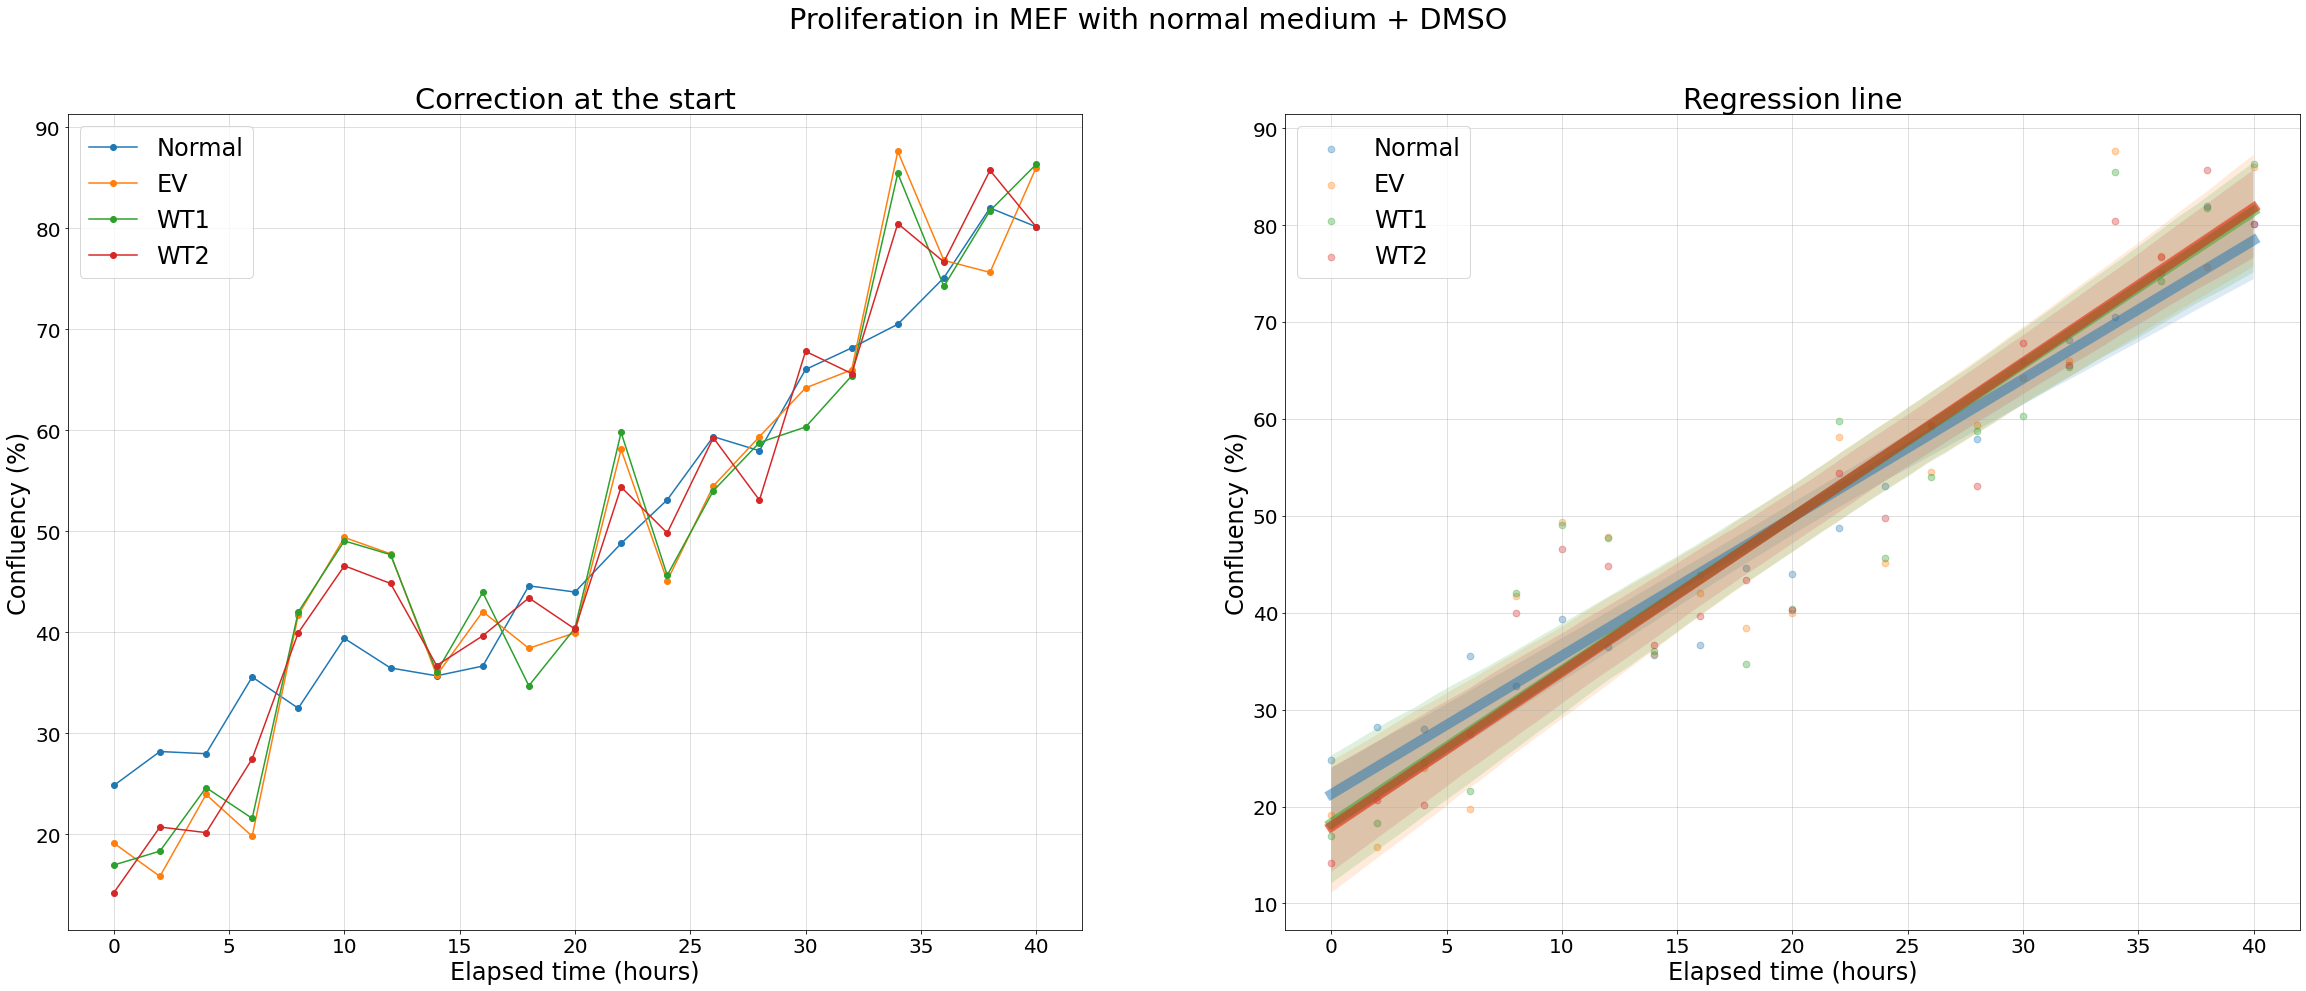

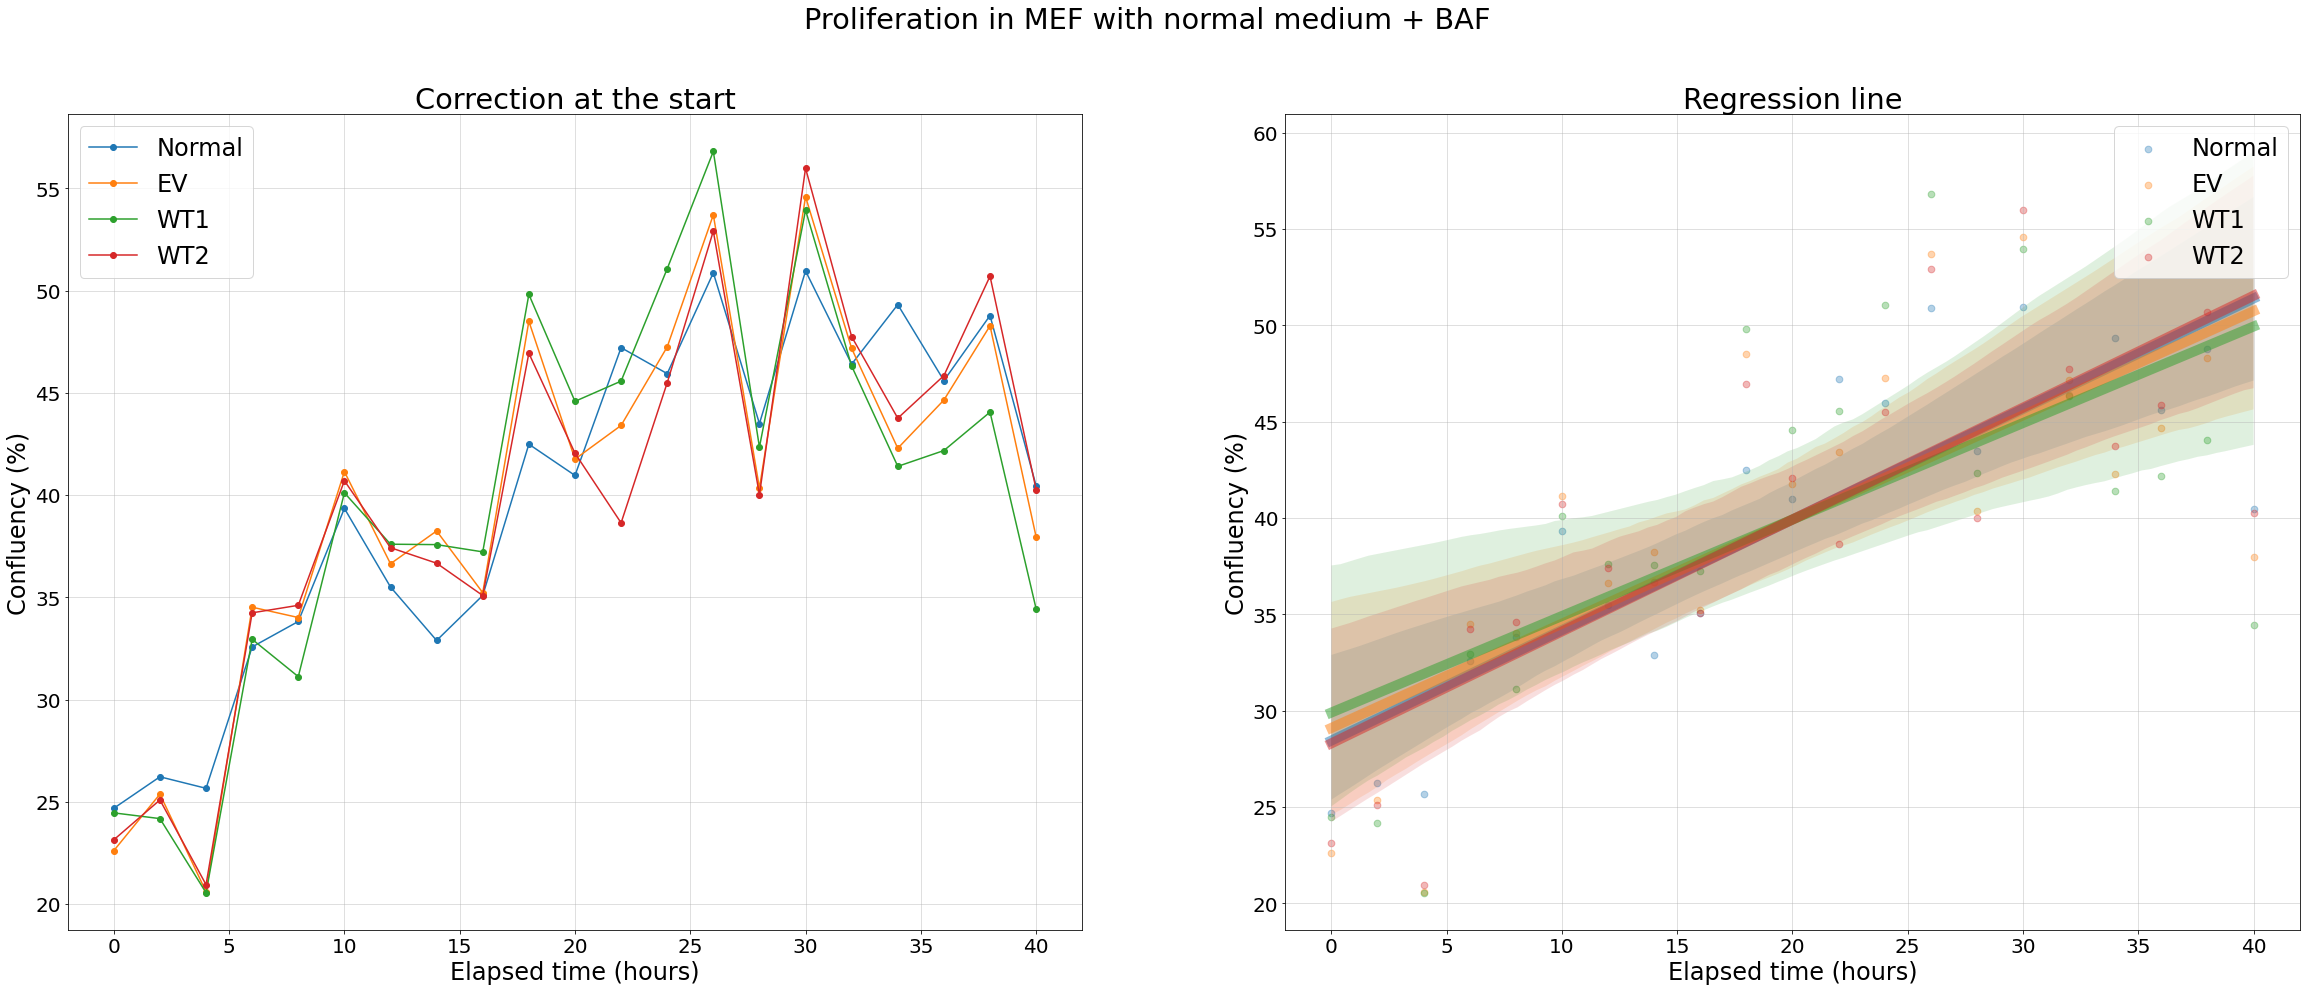

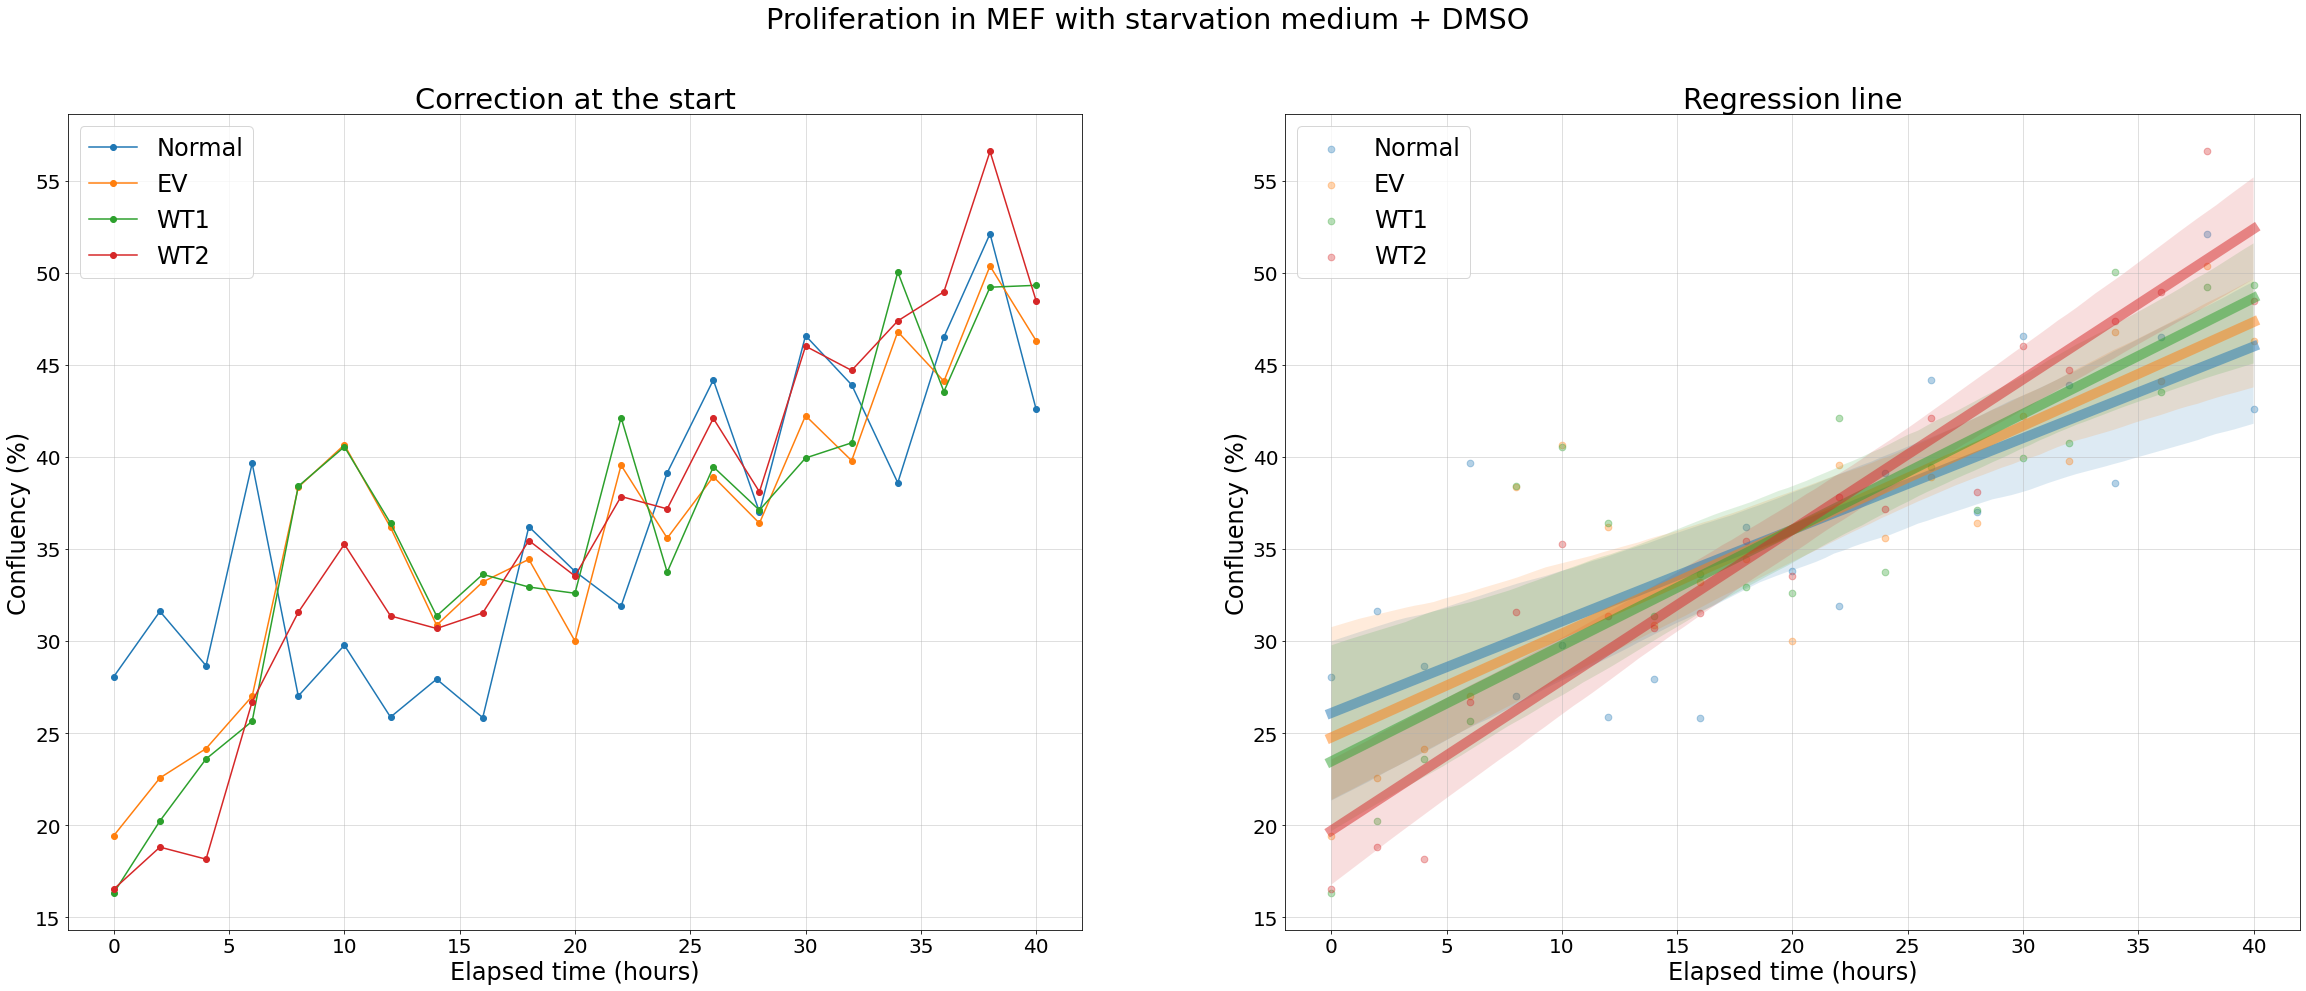

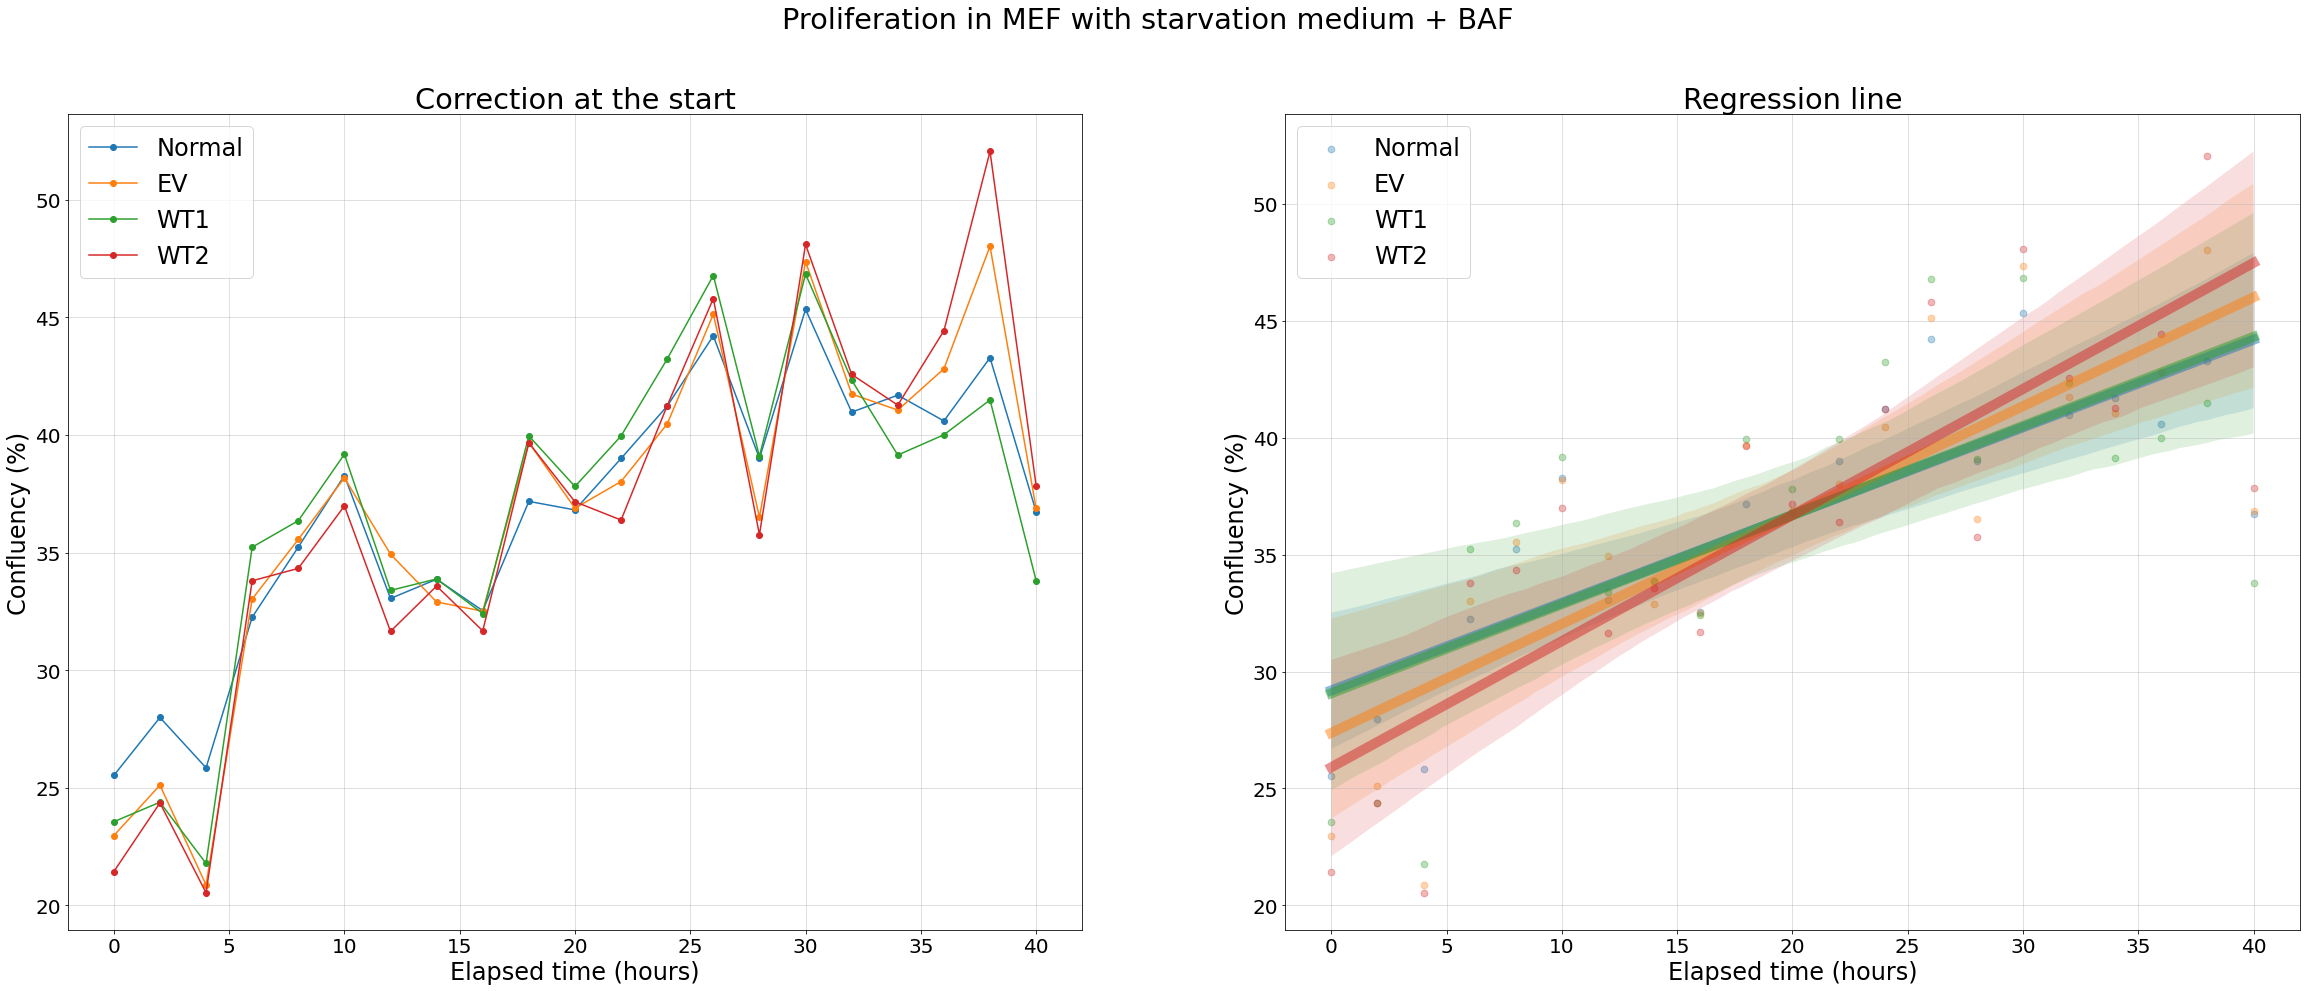

In [13]:
#Visualization of all data
columns_list = [prolif_rich_DMSO, prolif_rich_BAF, prolif_starv_DMSO, prolif_starv_BAF]
conditions = [' with normal medium + DMSO', ' with normal medium + BAF',
              ' with starvation medium + DMSO', ' with starvation medium + BAF']
drugs = ['rich_dmso', 'rich_baf', 'starv_dmso', 'starv_baf']

for i in range(len(columns_list)) :
    col_selection = columns_list[i]
    condition_label = conditions[i]
    drug = drugs[i]
    
    fig, ax = plt.subplots(1,2, figsize=(40,15))
    fig.suptitle('Proliferation in MEF'+ condition_label)
    
    list_ = [0,1,2,4] #represent norm/EV/WT1/WT2 delete list_ to have all
    for column in col_selection[list_]:     
        label_ = column.split(' ')[0]
        
#         #graph 1, data visualization
#         x=prolif_df['Elapsed']
#         y=prolif_df[column]
#         ax[0].plot(x, y, 'o-', label= label_)
#         ax[0].grid(alpha = 0.5)
#         ax[0].legend()
#         ax[0].set_title("Data visualization")
#         ax[0].set_ylabel('Confluency (%)')
#         ax[0].set_xlabel('Elapsed time (hours)')
        
        ##Correction
        shift = prolif_df[col_selection].mean()   #list of means for all columns
        general_mean = prolif_df[col_selection].mean().mean() #mean of means
        relative_mu = shift/general_mean #correction to apply for each column
        corrected_data = prolif_df[col_selection]/relative_mu #corrected data
        
        #graph 2, Correction at the start
        x=prolif_df['Elapsed']
        y=corrected_data[column]
        ax[0].plot(x, y, 'o-', label= label_)
        ax[0].grid(alpha = 0.5)
        ax[0].legend()
        ax[0].set_title("Correction at the start")
        ax[0].set_ylabel('Confluency (%)')
        ax[0].set_xlabel('Elapsed time (hours)')
        
        #graph 3, Regression lines
        x=prolif_df['Elapsed']
        y=corrected_data[column]
        seaborn.regplot(x=x, y=y,scatter=True, line_kws={'linewidth':10, 'alpha':0.5},
                        scatter_kws={'s':45, 'alpha':1/3}, label= label_)
        ax[1].grid(alpha = 0.5)
        ax[1].legend()
        ax[1].set_title("Regression line")
        ax[1].set_ylabel('Confluency (%)')
        ax[1].set_xlabel('Elapsed time (hours)')
        
        #save the graphs
        path = output_file_directory + 'ATG7/Proliferation/exp3/graph_exp3_'    
        fig.savefig(path+drug+'.svg')
        print()